In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [ ]:
gender_pay=pd.read_csv('gss_wages.csv')
gender_pay

,year,realrinc,age,occ10,occrecode,prestg10,childs,wrkstat,gender,educcat,maritalcat
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married
2,1974,NaN,83.0,NaN,NaN,NaN,2.0,Housekeeper,Female,Less Than High School,Widowed
3,1974,NaN,69.0,NaN,NaN,NaN,2.0,Housekeeper,Female,Less Than High School,Widowed
4,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married
...,...,...,...,...,...,...,...,...,...,...,...
61692,2018,NaN,37.0,5700.0,Office and Administrative Support,47.0,2.0,Full-Time,Female,High School,Divorced
61693,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married
61694,2018,1589.0,67.0,5140.0,Office and Administrative Support,40.0,3.0,Retired,Female,High School,Married
61695,2018,NaN,72.0,1540.0,Professional,47.0,2.0,Retired,Male,High School,Married


In [ ]:
gender_pay.shape

(61697, 11)

In [ ]:
gender_pay.head()

,year,realrinc,age,occ10,occrecode,prestg10,childs,wrkstat,gender,educcat,maritalcat
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married
2,1974,NaN,83.0,NaN,NaN,NaN,2.0,Housekeeper,Female,Less Than High School,Widowed
3,1974,NaN,69.0,NaN,NaN,NaN,2.0,Housekeeper,Female,Less Than High School,Widowed
4,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married


In [ ]:
gender_pay.tail()

,year,realrinc,age,occ10,occrecode,prestg10,childs,wrkstat,gender,educcat,maritalcat
61692,2018,NaN,37.0,5700.0,Office and Administrative Support,47.0,2.0,Full-Time,Female,High School,Divorced
61693,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married
61694,2018,1589.0,67.0,5140.0,Office and Administrative Support,40.0,3.0,Retired,Female,High School,Married
61695,2018,NaN,72.0,1540.0,Professional,47.0,2.0,Retired,Male,High School,Married
61696,2018,NaN,79.0,4020.0,Service,33.0,6.0,Housekeeper,Female,High School,Widowed


#3. Checking the types of data

In [ ]:
gender_pay.dtypes

year            int64
realrinc      float64
age           float64
occ10         float64
occrecode      object
prestg10      float64
childs        float64
wrkstat        object
gender         object
educcat        object
maritalcat     object
dtype: object

In [ ]:
gender_pay=gender_pay.rename(columns={"realrinc": "Income", "occ10": "occCode", "occrecode": "occupation", "educcat": "education","maritalcat": "maritalstat" })

In [ ]:
gender_pay.tail()

,year,Income,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat
61692,2018,NaN,37.0,5700.0,Office and Administrative Support,47.0,2.0,Full-Time,Female,High School,Divorced
61693,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married
61694,2018,1589.0,67.0,5140.0,Office and Administrative Support,40.0,3.0,Retired,Female,High School,Married
61695,2018,NaN,72.0,1540.0,Professional,47.0,2.0,Retired,Male,High School,Married
61696,2018,NaN,79.0,4020.0,Service,33.0,6.0,Housekeeper,Female,High School,Widowed


#Dropping the missing or null values.

In [ ]:
print(gender_pay.isnull().sum())

year               0
Income         23810
age              219
occCode         3561
occupation      3561
prestg10        4186
childs           189
wrkstat           21
gender             0
education        135
maritalstat       27
dtype: int64


#Detecting Outliers

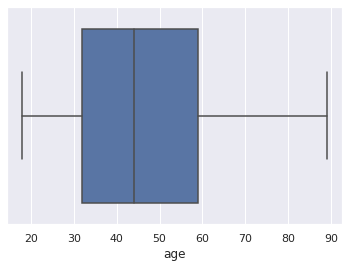

In [ ]:
sns.boxplot(x=gender_pay["age"])

In [ ]:
gender_pay = gender_pay.dropna(subset=['Income'])


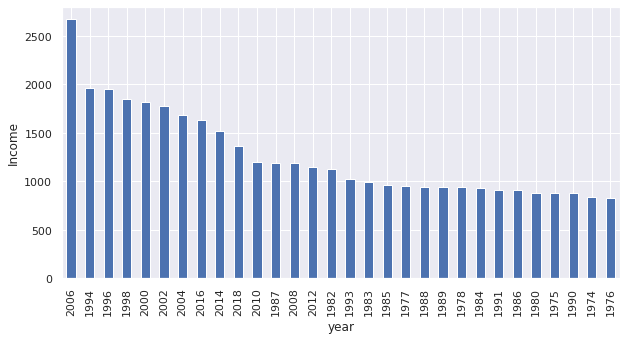

In [ ]:
gender_pay.year.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.ylabel("Income")
plt.xlabel("year");

# Finding the relations between the variables.

In [ ]:
corr=gender_pay.corr()
print(corr)

              year    Income       age   occCode  prestg10    childs
year      1.000000  0.067716  0.121718 -0.138381  0.049356 -0.050654
Income    0.067716  1.000000  0.157973 -0.190940  0.293627  0.044959
age       0.121718  0.157973  1.000000 -0.074998  0.095023  0.411074
occCode  -0.138381 -0.190940 -0.074998  1.000000 -0.508577  0.065759
prestg10  0.049356  0.293627  0.095023 -0.508577  1.000000 -0.036090
childs   -0.050654  0.044959  0.411074  0.065759 -0.036090  1.000000


,year,Income,age,occCode,prestg10,childs
year,1.000000,0.067716,0.121718,-0.138381,0.049356,-0.050654
Income,0.067716,1.000000,0.157973,-0.190940,0.293627,0.044959
age,0.121718,0.157973,1.000000,-0.074998,0.095023,0.411074
occCode,-0.138381,-0.190940,-0.074998,1.000000,-0.508577,0.065759
prestg10,0.049356,0.293627,0.095023,-0.508577,1.000000,-0.036090
childs,-0.050654,0.044959,0.411074,0.065759,-0.036090,1.000000


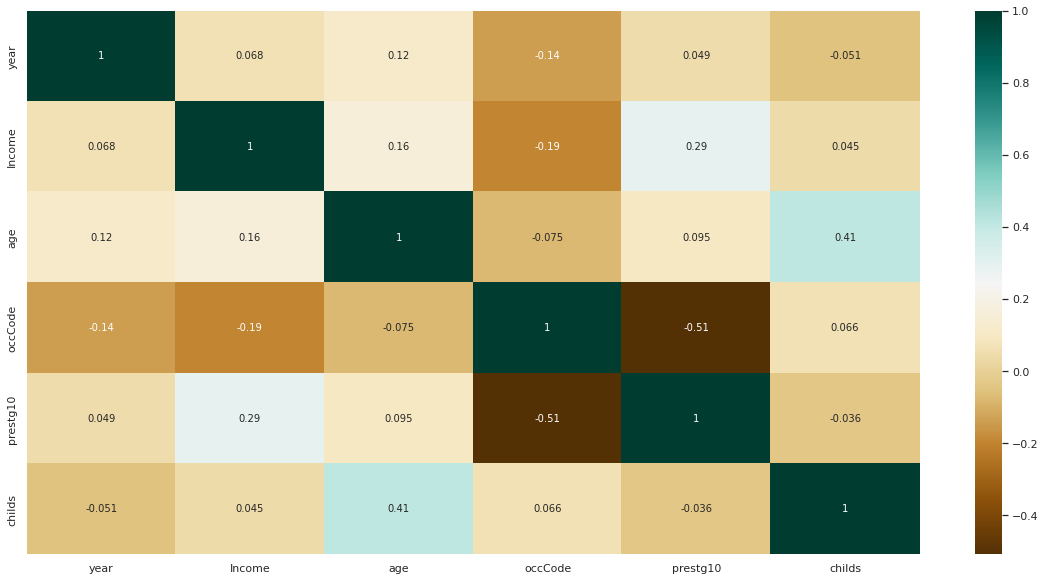

In [ ]:
plt.figure(figsize=(20,10))
c= gender_pay.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
mean_prest=gender_pay['prestg10'].where(gender_pay['wrkstat'] =='Housekeeper').mean()

In [ ]:
mean_prest

39.6651376146789

In [ ]:
gender_pay['prestg10'] = gender_pay['prestg10'].replace(np.nan, 39)


In [ ]:
gender_pay.head()

,year,Income,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married
4,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married
5,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married
6,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married


In [ ]:
print(gender_pay.isnull().sum())

year            0
Income          0
age            62
occCode        90
occupation     90
prestg10        0
childs         78
wrkstat         0
gender          0
education      41
maritalstat     4
dtype: int64


In [ ]:
gender_pay.shape

(37887, 11)

In [ ]:
meanAge = gender_pay.groupby(['childs', 'gender'])['age'].median()

In [ ]:
meanAge

childs  gender
0.0     Female    29.0
        Male      30.0
1.0     Female    36.0
        Male      37.0
2.0     Female    42.0
        Male      44.0
3.0     Female    44.0
        Male      46.0
4.0     Female    47.0
        Male      48.0
5.0     Female    49.0
        Male      50.5
6.0     Female    51.0
        Male      53.0
7.0     Female    54.0
        Male      51.0
8.0     Female    55.0
        Male      53.5
Name: age, dtype: float64

In [ ]:
gender_pay.head()
df=gender_pay
df

,year,Income,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married
4,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married
5,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married
6,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married
...,...,...,...,...,...,...,...,...,...,...,...
61684,2018,17025.0,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married
61685,2018,4086.0,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married
61688,2018,14755.0,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married
61693,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married


In [ ]:
df['age'].fillna(df.groupby(['childs','gender'])['age']. transform ('median'),inplace=True)

In [ ]:
print(df.isnull().sum())

year            0
Income          0
age             0
occCode        90
occupation     90
prestg10        0
childs         78
wrkstat         0
gender          0
education      41
maritalstat     4
dtype: int64


In [ ]:
meanchilds = gender_pay.groupby(['age', 'gender'])['childs'].median()

In [ ]:
meanchilds


age   gender
18.0  Female    0.0
      Male      0.0
19.0  Female    0.0
      Male      0.0
20.0  Female    0.0
               ... 
87.0  Male      3.0
88.0  Female    0.0
      Male      4.0
89.0  Female    2.0
      Male      2.0
Name: childs, Length: 145, dtype: float64

In [ ]:
df['childs'].fillna(df.groupby(['age','gender'])['childs']. transform ('median'),inplace=True)

In [ ]:
print(df.isnull().sum())

year            0
Income          0
age             0
occCode        90
occupation     90
prestg10        0
childs          0
wrkstat         0
gender          0
education      41
maritalstat     4
dtype: int64


In [ ]:

df.head()

,year,Income,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married
4,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married
5,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married
6,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married


In [ ]:
df = df.dropna(how='any',axis=0) 

In [ ]:
df.isnull().sum()

year           0
Income         0
age            0
occCode        0
occupation     0
prestg10       0
childs         0
wrkstat        0
gender         0
education      0
maritalstat    0
dtype: int64

In [ ]:
df.shape

(37752, 11)

In [ ]:
df.dtypes

year             int64
Income         float64
age            float64
occCode        float64
occupation      object
prestg10       float64
childs         float64
wrkstat         object
gender          object
education       object
maritalstat     object
dtype: object

In [ ]:
convert_dict = {'age': int,
                'occCode': int,
                'prestg10': int,
                'childs':int
              
                }
  
df =df.astype(convert_dict)

In [ ]:
df.dtypes

year             int64
Income         float64
age              int64
occCode          int64
occupation      object
prestg10         int64
childs           int64
wrkstat         object
gender          object
education       object
maritalstat     object
dtype: object

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [ ]:
df["occupation"].value_counts()

Professional                             7798
Service                                  6023
Office and Administrative Support        5612
Business/Finance                         4669
Sales                                    3603
Production                               3380
Construction/Extraction                  2156
Transportation                           2142
Installation, Maintenance, and Repair    1376
Armed Forces                              695
Farming, Fishing, and Forestry            298
Name: occupation, dtype: int64

In [ ]:
df["education"].value_counts()

High School              20035
Bachelor                  6660
Less Than High School     4988
Graduate                  3439
Junior College            2630
Name: education, dtype: int64

In [ ]:
df["wrkstat"].value_counts()

Full-Time                  27061
Part-Time                   5255
Unemployed, Laid Off        1381
Housekeeper                 1316
Temporarily Not Working     1106
Retired                      768
School                       685
Other                        180
Name: wrkstat, dtype: int64

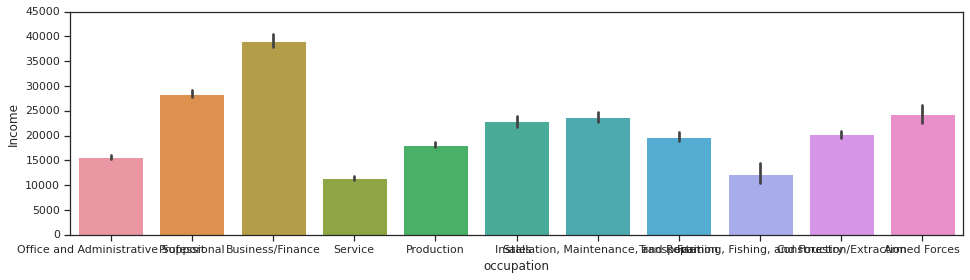

In [ ]:
sns.set_theme(style="ticks", color_codes=True)
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "occupation", y = "Income", ax=ax, data=df)

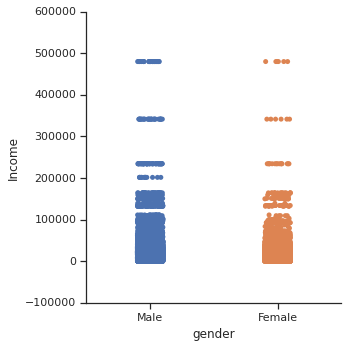

In [ ]:
sns.catplot(x = "gender", y = "Income", data=df)

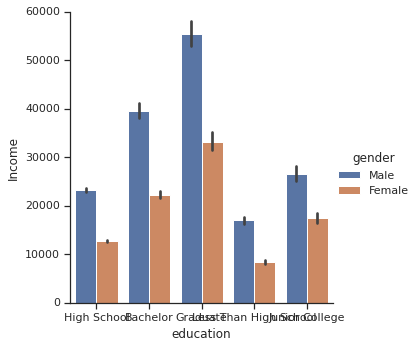

In [ ]:
sns.catplot(x="education", y="Income", hue="gender", kind="bar", data=df)

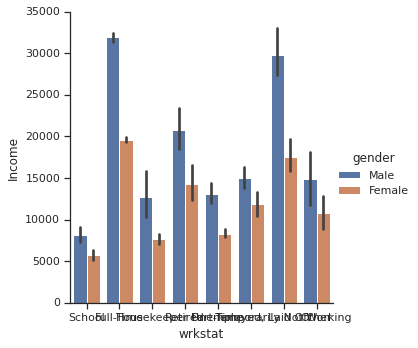

In [ ]:
sns.catplot(x="wrkstat", y="Income", hue="gender", kind="bar", data=df)

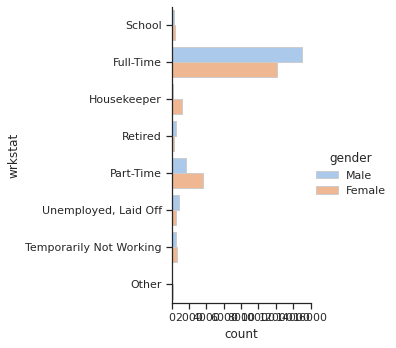

In [ ]:
sns.catplot(y="wrkstat", hue="gender", kind="count",
            palette="pastel", edgecolor=".8",
            data=df)

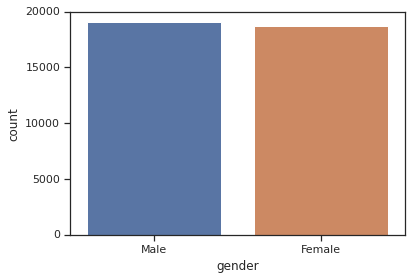

In [ ]:
sns.countplot(x='gender',data=df)

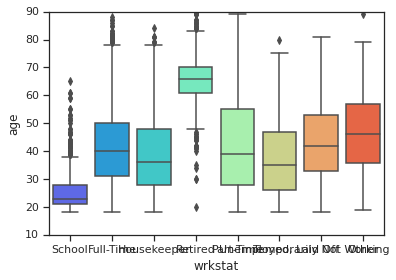

In [ ]:
sns.boxplot(x='wrkstat',y='age',data=df,palette='rainbow')

<h2>1.As a comapared to women men gets paid more or vice versa</h2>

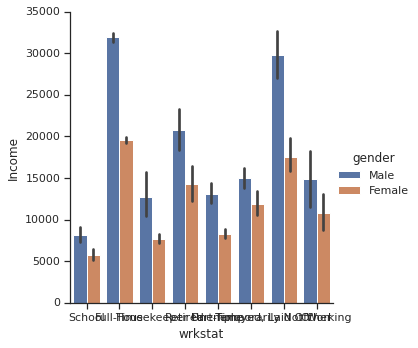

In [ ]:
sns.catplot(x="wrkstat", y="Income", hue="gender", kind="bar", data=df)

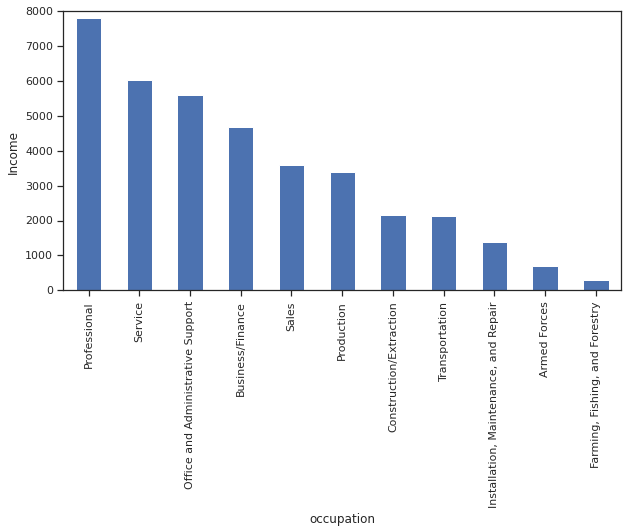

In [ ]:
df.occupation.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.ylabel("Income")
plt.xlabel("occupation");

In [ ]:
df['Income'].max()

480144.4729

In [ ]:
df['Income'].min()

227.0

In [ ]:
df.describe()

,year,Income,age,occCode,prestg10,childs
count,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000
mean,1995.962068,22341.744855,40.953274,4567.383132,43.764595,1.692281
std,12.561370,28604.177511,13.490676,2659.206231,13.020523,1.614730
min,1974.000000,227.000000,18.000000,10.000000,16.000000,0.000000
25%,1986.000000,8156.000000,30.000000,2330.000000,35.000000,0.000000
50%,1996.000000,16563.000000,39.000000,4700.000000,43.000000,2.000000
75%,2006.000000,27171.000000,51.000000,6220.000000,51.000000,3.000000
max,2018.000000,480144.472900,89.000000,9997.000000,80.000000,8.000000


In [ ]:
bins = [0, 10000,20000, 30000,100000, 500000]
labels = ['very low','low','moderate','high','super high']

In [ ]:
df['Income'] = pd.cut(df['Income'],bins,labels = labels)

In [ ]:
df.head(20)

,year,Income,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat
0,1974,very low,21,5620,Office and Administrative Support,25,0,School,Male,High School,Married
1,1974,high,41,2040,Professional,66,3,Full-Time,Male,Bachelor,Married
4,1974,low,58,5820,Office and Administrative Support,37,0,Full-Time,Female,High School,Never Married
5,1974,moderate,30,910,Business/Finance,45,0,School,Male,Bachelor,Married
6,1974,high,48,230,Business/Finance,59,2,Full-Time,Male,Graduate,Married
9,1974,very low,54,3940,Service,38,2,Full-Time,Female,Less Than High School,Married
14,1974,very low,22,4020,Service,33,0,Full-Time,Female,High School,Never Married
15,1974,low,23,7810,Production,28,1,Full-Time,Male,High School,Married
20,1974,low,25,8640,Production,31,0,Full-Time,Male,Less Than High School,Never Married
25,1974,high,59,4710,Sales,48,1,Full-Time,Male,Less Than High School,Married


In [ ]:
df['Income'].value_counts()

very low      11519
low           10765
moderate       7423
high           7331
super high      714
Name: Income, dtype: int64

In [ ]:
df=df[['year','age','occCode','occupation','prestg10','childs','wrkstat','gender','education','maritalstat','Income']]
df1=df

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37752 entries, 0 to 61694
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         37752 non-null  int64   
 1   age          37752 non-null  int64   
 2   occCode      37752 non-null  int64   
 3   occupation   37752 non-null  object  
 4   prestg10     37752 non-null  int64   
 5   childs       37752 non-null  int64   
 6   wrkstat      37752 non-null  object  
 7   gender       37752 non-null  object  
 8   education    37752 non-null  object  
 9   maritalstat  37752 non-null  object  
 10  Income       37752 non-null  category
dtypes: category(1), int64(5), object(5)
memory usage: 4.5+ MB


In [ ]:
df1['Income'].unique()

['very low', 'high', 'low', 'moderate', 'super high']
Categories (5, object): ['very low' < 'low' < 'moderate' < 'high' < 'super high']

In [ ]:

label_map={'Income':{'very low':0,'low':1,'moderate':2,'high':3,'super high':4}}
df1 = df1.replace(label_map)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37752 entries, 0 to 61694
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         37752 non-null  int64 
 1   age          37752 non-null  int64 
 2   occCode      37752 non-null  int64 
 3   occupation   37752 non-null  object
 4   prestg10     37752 non-null  int64 
 5   childs       37752 non-null  int64 
 6   wrkstat      37752 non-null  object
 7   gender       37752 non-null  object
 8   education    37752 non-null  object
 9   maritalstat  37752 non-null  object
 10  Income       37752 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.7+ MB


In [ ]:
df['occupation'].value_counts()

Professional                             7798
Service                                  6023
Office and Administrative Support        5612
Business/Finance                         4669
Sales                                    3603
Production                               3380
Construction/Extraction                  2156
Transportation                           2142
Installation, Maintenance, and Repair    1376
Armed Forces                              695
Farming, Fishing, and Forestry            298
Name: occupation, dtype: int64

In [ ]:
label_map={'gender':{'Male':0,'Female':1},'education':{'Less Than High School':0,'High School':1,'Junior College':2,'Graduate':3,'Bachelor':3}}
df1 = df1.replace(label_map)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37752 entries, 0 to 61694
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         37752 non-null  int64 
 1   age          37752 non-null  int64 
 2   occCode      37752 non-null  int64 
 3   occupation   37752 non-null  object
 4   prestg10     37752 non-null  int64 
 5   childs       37752 non-null  int64 
 6   wrkstat      37752 non-null  object
 7   gender       37752 non-null  int64 
 8   education    37752 non-null  int64 
 9   maritalstat  37752 non-null  object
 10  Income       37752 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.7+ MB


In [ ]:
df1.columns

Index(['year', 'age', 'occCode', 'occupation', 'prestg10', 'childs', 'wrkstat',
       'gender', 'education', 'maritalstat', 'Income'],
      dtype='object')

In [ ]:
col = ['occupation','wrkstat','maritalstat','gender', 'education']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for c in col:
    lbl = LabelEncoder() 
    lbl.fit(list(df1[c].values)) 
    df1[c] = lbl.transform(list(df1[c].values))

In [ ]:
df1

,year,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat,Income
0,1974,21,5620,5,25,0,5,0,1,1,0
1,1974,41,2040,7,66,3,0,0,3,1,3
4,1974,58,5820,5,37,0,0,1,1,2,1
5,1974,30,910,1,45,0,5,0,3,1,2
6,1974,48,230,1,59,2,0,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...
61684,2018,54,3230,7,59,0,0,1,3,1,1
61685,2018,25,2710,7,58,0,0,1,3,2,0
61688,2018,29,4760,8,31,0,0,1,1,1,1
61693,2018,75,4720,8,28,4,3,1,1,1,0


### split X & Y

In [ ]:
X = df1.drop('Income',axis=1)
Y =  df1['Income']

In [ ]:
X.shape,Y.shape

((37752, 10), (37752,))

In [ ]:
Y.value_counts()

0    11519
1    10765
2     7423
3     7331
4      714
Name: Income, dtype: int64

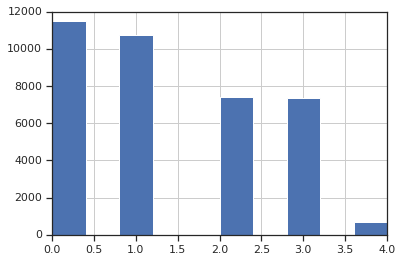

In [ ]:
Y.hist()

##Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm = SMOTE( random_state=7) #k_neighbours
X_train_res, Y_train_res = sm.fit_sample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_train_res.shape, Y_train_res.shape

((57595, 10), (57595,))

In [ ]:
len(Y_train_res[Y_train_res==0]),len(Y_train_res[Y_train_res==1]),len(Y_train_res[Y_train_res==2]) ,len(Y_train_res[Y_train_res==3]) ,len(Y_train_res[Y_train_res==4]) 

(11519, 11519, 11519, 11519, 11519)

In [ ]:
df1.describe()

,year,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat,Income
count,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000,37752.000000
mean,1995.962068,40.953274,4567.383132,5.900509,43.764595,1.692281,1.065930,0.495391,1.472558,1.278555,1.336618
std,12.561370,13.490676,2659.206231,2.820673,13.020523,1.614730,1.948551,0.499985,1.023984,0.887230,1.155613
min,1974.000000,18.000000,10.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,30.000000,2330.000000,5.000000,35.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1996.000000,39.000000,4700.000000,7.000000,43.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,2006.000000,51.000000,6220.000000,8.000000,51.000000,3.000000,1.000000,1.000000,3.000000,2.000000,2.000000
max,2018.000000,89.000000,9997.000000,10.000000,80.000000,8.000000,7.000000,1.000000,3.000000,4.000000,4.000000


##Train test split on oversampling

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train_res,Y_train_res,test_size = 0.3,
                                                 random_state=7)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((40316, 10), (17279, 10), (40316,), (17279,))

### Apply machine learning models

In [ ]:
def eval_model(Y_test,Y_predict):
    from sklearn.metrics import confusion_matrix,accuracy_score
    cf_mat=confusion_matrix(Y_test,Y_predict)
    acc=accuracy_score(Y_test,Y_predict)
    return cf_mat,acc

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier(random_state=7)
gbc = GradientBoostingClassifier(random_state=7)
adc = AdaBoostClassifier(random_state=7)
dct = DecisionTreeClassifier() 


In [ ]:
for model in [rfc,gbc,adc,dct]:
    print(model.__class__)
    model.fit(X_train,Y_train)
    Y_predict = model.predict(X_test)
    cf_mat, acc = eval_model(Y_test,Y_predict)
    print("Confusion Matrix \n",cf_mat)
    print("Accuracy : ",acc)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Confusion Matrix 
 [[2241  780  269  147   26]
 [ 812 1543  732  341   55]
 [ 260  641 1778  614  110]
 [ 105  287  593 2168  279]
 [  12   14   43   92 3337]]
Accuracy :  0.640488454192951
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Confusion Matrix 
 [[2272  778  236  106   71]
 [ 773 1598  692  305  115]
 [ 257  751 1407  708  280]
 [ 101  295  795 1466  775]
 [  26   58  166  328 2920]]
Accuracy :  0.559233751953238
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Confusion Matrix 
 [[2143  845  274  124   77]
 [ 791 1454  756  334  148]
 [ 295  711 1229  847  321]
 [ 149  301  791 1360  831]
 [  39   58  154  581 2666]]
Accuracy :  0.5122981654030905
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Confusion Matrix 
 [[1892  891  394  233   53]
 [ 884 1286  742  472   99]
 [ 353  728 1503  705  114]
 [ 193  407  713 1812  307]
 [  29   37  102  217 3113]]
Accuracy :  0.5559349499392326


## Fine tuning and feature selection

In [ ]:
##Fine tuning of adaBoost
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

param_grid = { 
    'n_estimators': [100,150,200],
    'base_estimator' : [DecisionTreeClassifier(random_state=7)],
}

from sklearn.model_selection import GridSearchCV

abc = AdaBoostClassifier(algorithm='SAMME',random_state=7)

CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid,\
                      cv= 2, verbose=2)


In [ ]:
CV_abc.fit(X_train, Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best'), n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best'), n_estimators=100, total=  14.6s
[CV] base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best'), n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.6s remaining:    0.0s


[CV]  base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best'), n_estimators=100, total=  33.0s
[CV] base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best'), n_estimators=150 
[CV]  base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.1min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=7),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=None,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                       

In [ ]:
print(CV_abc.best_params_)
print(CV_abc.cv_results_['mean_test_score'])
print(sum(CV_abc.cv_results_['mean_test_score'])/ len(CV_abc.cv_results_['mean_test_score']))

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best'), 'n_estimators': 150}
[0.58559877 0.60256474 0.60653339]
0.5982322981777293


In [ ]:
param_grid = { 
    'n_estimators': [100,150,200],
    'subsample' : [0.99,0.9],
    'n_iter_no_change' : [20,15],
    'learning_rate' : [0.3,0.2]
}

xgbc = GradientBoostingClassifier(random_state=7)

from sklearn.model_selection import GridSearchCV
CV_xgbc = GridSearchCV(estimator=xgbc, param_grid=param_grid,\
                      cv= 2, verbose=2)

CV_xgbc.fit(X_train, Y_train)

print(CV_xgbc.best_params_)
print(CV_xgbc.cv_results_['mean_test_score'])
print(sum(CV_xgbc.cv_results_['mean_test_score'])/ len(CV_xgbc.cv_results_['mean_test_score']))

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] learning_rate=0.3, n_estimators=100, n_iter_no_change=20, subsample=0.99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.3, n_estimators=100, n_iter_no_change=20, subsample=0.99, total=  15.8s
[CV] learning_rate=0.3, n_estimators=100, n_iter_no_change=20, subsample=0.99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.8s remaining:    0.0s


[CV]  learning_rate=0.3, n_estimators=100, n_iter_no_change=20, subsample=0.99, total=  14.5s
[CV] learning_rate=0.3, n_estimators=100, n_iter_no_change=20, subsample=0.9 
[CV]  learning_rate=0.3, n_estimators=100, n_iter_no_change=20, subsample=0.9, total=  15.1s
[CV] learning_rate=0.3, n_estimators=100, n_iter_no_change=20, subsample=0.9 
[CV]  learning_rate=0.3, n_estimators=100, n_iter_no_change=20, subsample=0.9, total=  15.0s
[CV] learning_rate=0.3, n_estimators=100, n_iter_no_change=15, subsample=0.99 
[CV]  learning_rate=0.3, n_estimators=100, n_iter_no_change=15, subsample=0.99, total=  16.0s
[CV] learning_rate=0.3, n_estimators=100, n_iter_no_change=15, subsample=0.99 
[CV]  learning_rate=0.3, n_estimators=100, n_iter_no_change=15, subsample=0.99, total=  14.2s
[CV] learning_rate=0.3, n_estimators=100, n_iter_no_change=15, subsample=0.9 
[CV]  learning_rate=0.3, n_estimators=100, n_iter_no_change=15, subsample=0.9, total=  14.8s
[CV] learning_rate=0.3, n_estimators=100, n_ite

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 14.8min finished


{'learning_rate': 0.2, 'n_estimators': 200, 'n_iter_no_change': 20, 'subsample': 0.99}
[0.59524754 0.59467705 0.59524754 0.59338724 0.59604127 0.59661177
 0.59604127 0.5937345  0.59626451 0.59661177 0.59626451 0.5937345
 0.59237027 0.59241988 0.59237027 0.59241988 0.59693422 0.59713265
 0.59569402 0.5949995  0.59996031 0.59941462 0.59770315 0.59569402]
0.5954573453054207


In [ ]:
xgbc = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 200, n_iter_no_change= 20, subsample= 0.99,random_state=7)

In [ ]:
xgbc.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=20, presort='deprecated',
                           random_state=7, subsample=0.99, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred=xgbc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,y_pred)
acc

0.6136929220440998

In [ ]:

from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(10) 
pca.fit(X_train)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
print(X_train_new.shape)
X_train_new

(40316, 10)


array([[-7.10749798e-01, -2.38922249e+01,  1.24338463e+01, ...,
        -1.39557944e-01, -1.76252062e-01,  6.84139548e-02],
       [-4.27134383e+00,  1.23202796e+01, -1.42369375e+01, ...,
        -1.23696449e-01, -3.29585330e-01,  1.59071649e-01],
       [-4.28350790e-02,  1.29731548e+01,  1.10980173e+01, ...,
        -3.45169290e-01, -2.81900044e-01, -9.20674971e-03],
       ...,
       [ 1.09120656e+01,  1.38042152e+01, -6.31276621e+00, ...,
         5.88153221e-02, -7.59231873e-01, -2.73184798e-01],
       [-1.26467763e+01,  2.68868761e+00,  7.53132700e+00, ...,
        -2.70323160e-01, -3.89421151e-02, -9.20414925e-02],
       [ 1.74494052e+01,  2.02705074e+01, -5.73199359e+00, ...,
         6.33060284e-01,  5.91138927e-02, -1.23362117e-01]])

In [ ]:
pca.explained_variance_ratio_


array([4.32050441e-01, 3.04100511e-01, 2.56000726e-01, 3.66187320e-03,
       1.35271040e-03, 5.27883321e-04, 4.10278134e-04, 3.44342629e-04,
       2.27643649e-04, 1.79607487e-04])

In [ ]:
pca.explained_variance_

array([2.26906585e+02, 1.59709149e+02, 1.34447845e+02, 1.92316236e+00,
       7.10423759e-01, 2.77236615e-01, 2.15472088e-01, 1.80843723e-01,
       1.19555121e-01, 9.43272306e-02])

In [ ]:
df1.corr()

,year,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat,Income
year,1.000000,0.122136,-0.138342,0.041066,0.053993,-0.049419,0.006467,-0.040146,-0.134936,0.001571,0.040294
age,0.122136,1.000000,-0.074917,-0.045407,0.094423,0.411834,0.015697,0.018038,0.031615,-0.087782,0.187272
occCode,-0.138342,-0.074917,1.000000,0.219256,-0.504625,0.065448,0.044089,0.134924,0.354734,0.018800,-0.200767
occupation,0.041066,-0.045407,0.219256,1.000000,-0.186747,-0.000016,0.068870,-0.139870,0.098514,0.061733,-0.227866
prestg10,0.053993,0.094423,-0.504625,-0.186747,1.000000,-0.036697,-0.110139,0.015594,-0.393575,-0.075233,0.383188
childs,-0.049419,0.411834,0.065448,-0.000016,-0.036697,1.000000,-0.006416,-0.024016,0.186209,-0.145979,0.030869
wrkstat,0.006467,0.015697,0.044089,0.068870,-0.110139,-0.006416,1.000000,-0.064167,0.092041,0.096847,-0.295563
gender,-0.040146,0.018038,0.134924,-0.139870,0.015594,-0.024016,-0.064167,1.000000,0.021745,-0.030661,0.301595
education,-0.134936,0.031615,0.354734,0.098514,-0.393575,0.186209,0.092041,0.021745,1.000000,0.047270,-0.291688
maritalstat,0.001571,-0.087782,0.018800,0.061733,-0.075233,-0.145979,0.096847,-0.030661,0.047270,1.000000,-0.154211


In [ ]:
male = df1['Income'].where(df1['gender'] == 1).mean()
male

### Lasso and Ridge

In [ ]:
corr = df1.corr()
corr_target = abs(corr['Income'])
print(df1.columns[corr_target > 0.2][:-1])

df1.columns[abs(df1.corr()['Income']) > 0.2][:-1]

Index(['occCode', 'occupation', 'prestg10', 'wrkstat', 'gender', 'education'], dtype='object')


Index(['occCode', 'occupation', 'prestg10', 'wrkstat', 'gender', 'education'], dtype='object')

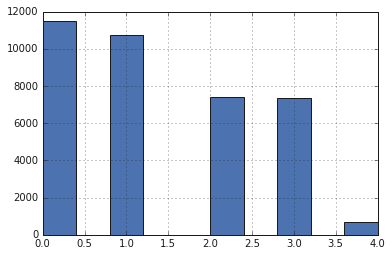

In [ ]:
Y.hist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.30, random_state=7)

In [ ]:
# --> more simpler model  (BUT can be underfitting)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.02)
lasso.fit(X_train, Y_train)
lasso.coef_

array([ 0.00783266,  0.0208801 , -0.        , -0.05571545,  0.02649117,
        0.00752205, -0.1509274 ,  0.78826717, -0.23752277, -0.08928812])

In [ ]:
X_train_new = pd.DataFrame(X_train)

In [ ]:
for c, l_v in zip(X_train_new.columns, lasso.coef_):
    print(c,l_v)

0 0.007785297034848433
1 0.020462138431874548
2 -0.052763901044870054
3 -0.053920579630485695
4 0.025626156462905118
5 0.012866121644782695
6 -0.15207132697500253
7 0.8355819599593415
8 -0.24468192480960083
9 -0.10251995027040618


In [ ]:
selected_columns = X_train_new.columns[lasso.coef_ !=0 ]
selected_columns

Int64Index([0, 1, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [ ]:
df1.head(2)

,year,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat,Income
0,1974,21,0.561730,5,25,0,5,1,2,1,0
1,1974,41,0.203264,7,66,3,0,1,0,1,3


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100)
ridge.fit(X_train,Y_train)
ridge.coef_

array([ 0.00741858,  0.01989286, -0.26481907, -0.04819179,  0.02354663,
        0.01889495, -0.15345619,  0.88392357, -0.24427342, -0.11652935])

In [ ]:
for c, r_v in zip(X_train_new.columns, ridge.coef_):
    print(c,r_v)

0 0.007418583566890174
1 0.019892864342813756
2 -0.26481906969729196
3 -0.04819179465797267
4 0.023546627111057365
5 0.01889494528940266
6 -0.15345618846744127
7 0.8839235710419129
8 -0.24427341577544012
9 -0.11652934682864499


### Testing Model

In [ ]:
df1.head(2)

,year,age,occCode,occupation,prestg10,childs,wrkstat,gender,education,maritalstat,Income
0,1974,21,5620,5,25,0,5,0,1,1,0
1,1974,41,2040,7,66,3,0,0,3,1,3


In [ ]:
X_test[1,:]

array([2001,   34, 4010,    9,   38,    1,    0,    0,    1,    2])

In [ ]:
Sample = (1974,21,5620,5,25,0,5,0,1,1)
Test = np.array(Sample)
Test=Test.reshape(1,-1)
Result= rfc.predict(Test)
Result

(10,)
(1, 10)


array([0])

# Conclusion
After passing the data elements we got the predicted value as similar to the original test dataframe